In [199]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/extended-crab-age-prediction/train_extended.csv


In [200]:
data_frame = pd.read_csv("/kaggle/input/extended-crab-age-prediction/train_extended.csv")

print(data_frame.head)

<bound method NDFrame.head of             id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0            0   M  1.5750    1.2250  0.3750  31.226974       12.303683   
1            1   I  1.2375    1.0000  0.3750  21.885814        7.654365   
2            2   F  1.4500    1.1625  0.4125  28.250277       11.127179   
3            3   I  1.3500    1.0250  0.3750  21.588144        9.738053   
4            4   I  1.1375    0.8750  0.2875  14.968536        5.953395   
...        ...  ..     ...       ...     ...        ...             ...   
199995  199995   F  1.8125    1.2750  0.4375  42.141532       20.000572   
199996  199996   F  0.9875    0.6750  0.2375   7.980384        3.742134   
199997  199997   M  1.1250    0.9125  0.2875  10.886208        4.904464   
199998  199998   I  1.6250    1.2750  0.4125  33.891827       13.196692   
199999  199999   F  1.5875    1.2500  0.3875  34.373769       17.222321   

        Viscera Weight  Shell Weight   Age  
0             6.321938  

In [201]:
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              200000 non-null  int64  
 1   Sex             200000 non-null  object 
 2   Length          200000 non-null  float64
 3   Diameter        200000 non-null  float64
 4   Height          200000 non-null  float64
 5   Weight          200000 non-null  float64
 6   Shucked Weight  200000 non-null  float64
 7   Viscera Weight  200000 non-null  float64
 8   Shell Weight    200000 non-null  float64
 9   Age             200000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.3+ MB
None


In [202]:
data_frame['Sex'] = data_frame['Sex'].map({'M':1, 'F':0})

In [203]:
print(data_frame.corr())

                      id       Sex    Length  Diameter    Height    Weight  \
id              1.000000  0.000244  0.001507  0.001990  0.001504  0.001970   
Sex             0.000244  1.000000 -0.093644 -0.095008 -0.100592 -0.085621   
Length          0.001507 -0.093644  1.000000  0.990714  0.932287  0.936370   
Diameter        0.001990 -0.095008  0.990714  1.000000  0.936113  0.939323   
Height          0.001504 -0.100592  0.932287  0.936113  1.000000  0.913238   
Weight          0.001970 -0.085621  0.936370  0.939323  0.913238  1.000000   
Shucked Weight  0.001912 -0.060101  0.912346  0.912349  0.870511  0.969934   
Viscera Weight  0.001969 -0.090047  0.918988  0.920631  0.895698  0.973749   
Shell Weight    0.001637 -0.097873  0.918473  0.924803  0.917067  0.966636   
Age             0.000161 -0.086223  0.623009  0.631046  0.662558  0.614185   

                Shucked Weight  Viscera Weight  Shell Weight       Age  
id                    0.001912        0.001969      0.001637  0.0001

In [204]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [205]:
data_frame = data_frame.drop('id',axis=1)
data_frame = data_frame.drop('Sex', axis=1)

In [206]:
print(data_frame.corr())

                  Length  Diameter    Height    Weight  Shucked Weight  \
Length          1.000000  0.990714  0.932287  0.936370        0.912346   
Diameter        0.990714  1.000000  0.936113  0.939323        0.912349   
Height          0.932287  0.936113  1.000000  0.913238        0.870511   
Weight          0.936370  0.939323  0.913238  1.000000        0.969934   
Shucked Weight  0.912346  0.912349  0.870511  0.969934        1.000000   
Viscera Weight  0.918988  0.920631  0.895698  0.973749        0.945974   
Shell Weight    0.918473  0.924803  0.917067  0.966636        0.907481   
Age             0.623009  0.631046  0.662558  0.614185        0.503512   

                Viscera Weight  Shell Weight       Age  
Length                0.918988      0.918473  0.623009  
Diameter              0.920631      0.924803  0.631046  
Height                0.895698      0.917067  0.662558  
Weight                0.973749      0.966636  0.614185  
Shucked Weight        0.945974      0.907481  0.

In [207]:
X = data_frame.drop('Age', axis=1)
y = data_frame['Age']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

In [208]:
model.fit(X_train, y_train)

LinearRegression()

In [209]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("Coefficients: \n", model.coef_)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

Coefficients: 
 [ 0.38353104  1.9884321  11.53751428  0.22551299 -0.65333897 -0.2969967
  0.57254701]
The r2 is:  0.5856666687354787
The rmse is:  2.072933649216425


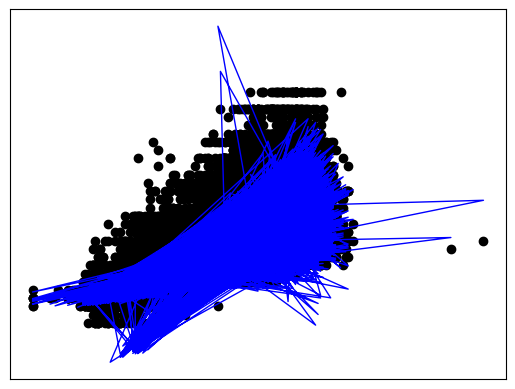

In [210]:
import matplotlib.pyplot as plt

plt.scatter(X_test['Diameter'], y_test, color="black")
plt.plot(X_test['Diameter'], predictions, color="blue", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()